In [1]:
import numpy as np 
import pandas as pd

In [5]:
data = pd.read_csv('coordinate/mediapipe.csv')
df = pd.DataFrame()

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.477071,0.606283,0.668347,0.680412,0.702318,0.537572,0.533004,0.527385,0.523552,0.439535,...,-0.217912,-0.253274,-0.118070,-0.170643,-0.220636,-0.268221,-0.121453,-0.171389,-0.208596,-0.238625
1,0.488555,0.607120,0.661938,0.690964,0.721613,0.545311,0.559543,0.569807,0.552206,0.465323,...,-0.237038,-0.258127,-0.181592,-0.260507,-0.273684,-0.275511,-0.233379,-0.296126,-0.307479,-0.311225
2,0.481384,0.619640,0.675849,0.677594,0.708582,0.551304,0.545840,0.534844,0.519484,0.463970,...,-0.129377,-0.167132,-0.081550,-0.119345,-0.157837,-0.198237,-0.111466,-0.160505,-0.203542,-0.241168
3,0.496137,0.626755,0.677994,0.680503,0.712520,0.550273,0.550639,0.552169,0.549895,0.465678,...,-0.060594,-0.088973,-0.039487,-0.062926,-0.098019,-0.135322,-0.066665,-0.103794,-0.143099,-0.180362


In [6]:
# 벡터로 변환

vector_columnList = ['v0->1', 'v1->2', 'v2->3', 'v3->4', 'v0->5', 'v5->6', 'v6->7', 'v7->8', 'v0->9', 'v9->10',
                    'v10->11', 'v11->12', 'v0->13', 'v13->14', 'v14->15', 'v15->16', 'v0->17', 'v17->18', 'v18->19','v19->20']
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20]]

vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)

In [7]:
degree_list = [[0,1], [1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14], [14,15], [16,17], [17,18], [18,19]]
result = pd.DataFrame()
for d in degree_list:
    a=vector_data[d[0]].x*vector_data[d[1]].x+vector_data[d[0]].y*vector_data[d[1]].y+vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2+vector_data[d[0]].y**2+vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2+vector_data[d[1]].y**2+vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

label = [0,1,1,1,0,0,2,2,2,3,3,3]

result

,vec0-1,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,0.735457,0.376703,0.183639,0.243790,0.239871,0.128357,0.130114,0.259048,0.109779,0.111927,0.241637,0.003630,0.198305,0.130434,0.105068
1,0.623882,0.237555,0.065182,0.908459,1.945518,0.604822,0.072513,0.223120,0.167224,0.150618,0.378372,0.133669,0.354870,0.346686,0.135453
2,0.741327,0.456951,0.387420,0.425551,0.173681,0.209771,0.093085,0.211391,0.091844,0.112559,0.209064,0.086094,0.255210,0.213656,0.090715
3,0.786623,0.447374,0.383148,0.226898,0.024966,0.110547,0.081761,0.234996,0.116735,0.159392,0.296462,0.087371,0.299928,0.264399,0.087995


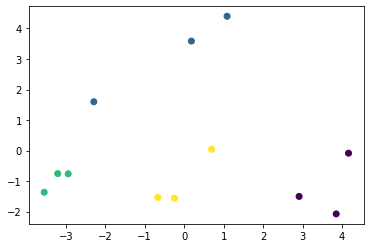

In [79]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardScaler = StandardScaler()

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(standardScaler.fit_transform(result))
df = pd.DataFrame(data=printcipalComponents, columns=['x','y'])

plt.scatter(df.x, df.y, c=label)